In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, IntSlider, ToggleButtons, fixed
%matplotlib inline

In [2]:
kaggel_dir = 'data/Kaggle_CT/'
medseg = kaggel_dir + 'images_medseg.npy', kaggel_dir + 'masks_medseg.npy'
radiopedia = kaggel_dir + 'images_radiopedia.npy', kaggel_dir + 'masks_radiopedia.npy'

In [3]:
DICT_SEGMENT = {0: "ground glass", 
                1: "consolidations", 
                2: "lungs other", 
                3: "background"}

In [4]:
def load_np(images_path, masks_path):
    images = np.load(images_path).astype(np.float32)
    masks = np.load(masks_path).astype(np.int8)
    return images, masks


rp_images, rp_masks = load_np(radiopedia[0], radiopedia[1])
ms_images, ms_masks = load_np(medseg[0], medseg[1])

In [5]:
@interact
def plot_ct(slice=range(rp_images.shape[0])):
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 9))
    axes[0].imshow(rp_images[slice, :, :], cmap='gray')
    axes[0].set_title('CT image')
    for i in range(4):
        axes[i + 1].imshow(rp_masks[slice, :, :, i].squeeze())
        axes[i + 1].set_title(DICT_SEGMENT[i])
    fig.suptitle('Radiopedia data', y=0.68, fontsize=16)
    plt.show()

interactive(children=(Dropdown(description='slice', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

In [6]:
@interact
def plot_ct(slice=range(ms_images.shape[0])):
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 9))
    axes[0].imshow(ms_images[slice, :, :], cmap='gray')
    axes[0].set_title('CT image')
    for i in range(4):
        axes[i + 1].imshow(ms_masks[slice, :, :, i].squeeze())
        axes[i + 1].set_title(DICT_SEGMENT[i])
    fig.suptitle('Medseg data', y=0.68, fontsize=16)
    plt.show()

interactive(children=(Dropdown(description='slice', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

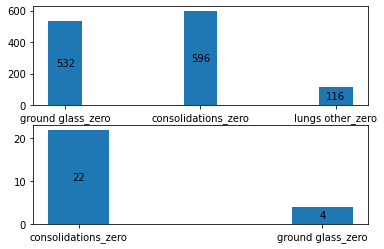

In [7]:
from collections import Counter


def small_stats(masks):
    stats_counter = Counter()
    for mask in masks:
        for i in range(4):
            if mask[:, :, i].sum() == 0:
                stats_counter[DICT_SEGMENT[i] + '_zero'] += 1
    return stats_counter


rp_stats = small_stats(rp_masks)
ms_stats = small_stats(ms_masks)

fig, axes = plt.subplots(nrows = 2, ncols=1)
width = 0.25
p1 = axes[0].bar(rp_stats.keys(), rp_stats.values(), width=width)
axes[0].bar_label(p1, label_type='center')

p2 = axes[1].bar(ms_stats.keys(), ms_stats.values(), width=width)
axes[1].bar_label(p2, label_type='center')
plt.show()

In [8]:
print(rp_stats)
print(rp_stats.values())
print(rp_stats.keys())
print(len(rp_stats))

Counter({'consolidations_zero': 596, 'ground glass_zero': 532, 'lungs other_zero': 116})
dict_values([532, 596, 116])
dict_keys(['ground glass_zero', 'consolidations_zero', 'lungs other_zero'])
3
